In [13]:
from bioinfokit import analys, visuz
pd.options.mode.chained_assignment = None
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os

In [14]:
eae_genes = pd.read_csv('data\EAE_gene_list.csv')

In [15]:
os.listdir('data') 

['EAE_gene_list.csv',
 'F_IgE_vs_M_IgE_Differential_Expression.xlsx',
 'F_Unstim_vs_F_IgE_Differential_Expression.xlsx',
 'F_Unstim_vs_M_Unstim_Differential_Expression.xlsx',
 'M_Unstim_vs_M_IgE_Differential_Expression.xlsx',
 'OneDrive_1_2-7-2022.zip']

In [16]:
ige_MF=pd.read_excel('data\F_IgE_vs_M_IgE_Differential_Expression.xlsx')
df_F=pd.read_excel('data\F_Unstim_vs_F_IgE_Differential_Expression.xlsx')
unstim_MF=pd.read_excel('data\F_Unstim_vs_M_Unstim_Differential_Expression.xlsx')
df_M=pd.read_excel('data\M_Unstim_vs_M_IgE_Differential_Expression.xlsx')

In [35]:
df

,Ensembl ID,Gene Symbol,Entrez ID,Description,Location,Strand,Log2 Fold Change,LFC Standard Error,Wald Statistic,p Value,FDR Adj p Value,Significant,Status,Base Mean,M_Unstim,M_IgE,M_unstim_S2,M_IgE_S1
3,ENSMUSG00000061353,Cxcl12,20315,chemokine (C-X-C motif) ligand 12,chr6:117168534-117181368,+,-1.803801,0.793005,-2.274640,0.022928,0.706704,No,OK,653.118691,1157.523314,148.714067,1157.523314,148.714067
43,ENSMUSG00000002983,Relb,19698,avian reticuloendotheliosis viral (v-rel) onco...,chr7:19606221-19629438,-,1.803021,0.816245,2.208922,0.027180,0.706704,No,OK,216.172800,32.491883,399.853717,32.491883,399.853717
48,ENSMUSG00000060470,Adgrg3,54672,adhesion G protein-coupled receptor G3,chr8:95017691-95045249,+,-1.696276,0.770434,-2.201716,0.027685,0.706704,No,OK,1265.585306,2165.787043,365.383569,2165.787043,365.383569
49,ENSMUSG00000037820,Tgm2,21817,"transglutaminase 2, C polypeptide",chr2:158116404-158146392,-,1.697989,0.771612,2.200574,0.027766,0.706704,No,OK,8041.582268,2306.923658,13776.240879,2306.923658,13776.240879
53,ENSMUSG00000024066,Xdh,22436,xanthine dehydrogenase,chr17:73883894-73950196,-,1.729559,0.787743,2.195588,0.028121,0.706704,No,OK,517.065645,131.998273,902.133017,131.998273,902.133017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20557,ENSMUSG00000076066,Mir223,723814,microRNA 223,chrX:96242816-96242926,+,NaN,NaN,NaN,NaN,NaN,No,Low,0.000000,0.000000,0.000000,0.000000,0.000000
20604,ENSMUSG00000076361,Mir182,387177,microRNA 182,chr6:30165917-30165992,-,NaN,NaN,NaN,NaN,NaN,No,Low,0.000000,0.000000,0.000000,0.000000,0.000000
20723,ENSMUSG00000078452,Raet1d,56554,retinoic acid early transcript delta,chr10:22361893-22374139,+,NaN,NaN,NaN,NaN,NaN,No,Low,0.000000,0.000000,0.000000,0.000000,0.000000
22146,ENSMUSG00000095509,Mir467b,735257,microRNA 467b,chr2:10481247-10481320,+,NaN,NaN,NaN,NaN,NaN,No,Low,0.000000,0.000000,0.000000,0.000000,0.000000


In [42]:
def preprocess(df):
    df = df[df.columns[[1,2, 6, 9, -4, -3]]]
    df = df.loc[df['Entrez ID'].isin(eae_genes['GeneID'])]
    df = df.dropna()
    df = df.replace(0, np.nan)
    df = df.dropna(axis=0, thresh = 2).fillna(0)
    return df

In [47]:
for i in [ige_MF, df_F, unstim_MF, df_M]:
    a = preprocess(i)
    i=a

In [51]:
ige_MF = preprocess(ige_MF)
df_F = preprocess(df_F)
unstim_MF = preprocess(unstim_MF)
df_M = preprocess(df_M)

In [53]:
ige_MF

,Gene Symbol,Entrez ID,Log2 Fold Change,p Value,F_IgE,M_IgE
2,Ccl17,20295,0.934337,0.029440,245.078559,764.367152
6,Ccl5,20304,0.939918,0.030207,113.185136,450.067931
37,Il7r,16197,0.916475,0.034031,86.058120,359.199109
51,Il33,77125,0.848946,0.034953,689.400374,1627.086441
53,Lgals3,16854,0.810414,0.035222,6862.199647,14809.479937
...,...,...,...,...,...,...
14702,Fasl,14103,0.008951,0.960922,0.935414,1.069045
14703,Fndc5,384061,0.008951,0.960922,0.935414,1.069045
14715,Perp,64058,0.008951,0.960922,0.935414,1.069045
14749,Chrna9,231252,0.008951,0.960922,0.935414,1.069045


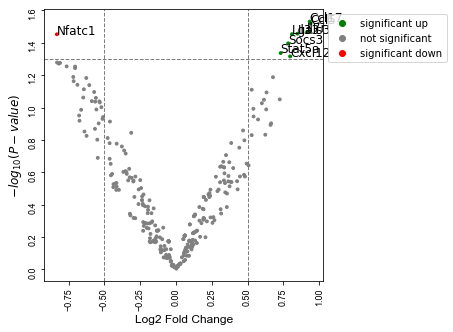

In [62]:
visuz.GeneExpression.volcano(df=ige_MF, 
                             lfc='Log2 Fold Change', 
                             axxlabel = 'Log2 Fold Change', 
                             pv='p Value', 
                             show=True, 
                             plotlegend=True, 
                             legendpos='upper right',
                             legendanchor=(1.46,1), 
                             geneid='Gene Symbol', 
                             genenames='deg', 
                             gfont=12, 
                             sign_line=True, 
                             axlabelfontsize=12,
                            lfc_thr=[-0.5, -0.5])

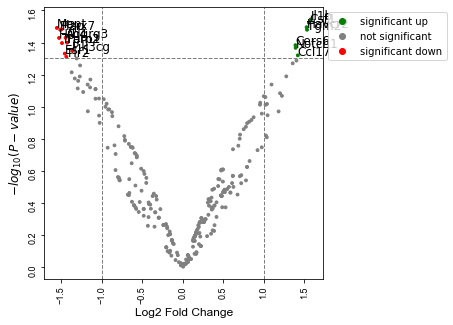

In [63]:
visuz.GeneExpression.volcano(df=df_F, 
                             lfc='Log2 Fold Change', 
                             axxlabel = 'Log2 Fold Change', 
                             pv='p Value', 
                             show=True, 
                             plotlegend=True, 
                             legendpos='upper right',
                             legendanchor=(1.46,1), 
                             geneid='Gene Symbol', 
                             genenames='deg', 
                             gfont=12, 
                             sign_line=True, 
                             axlabelfontsize=12)

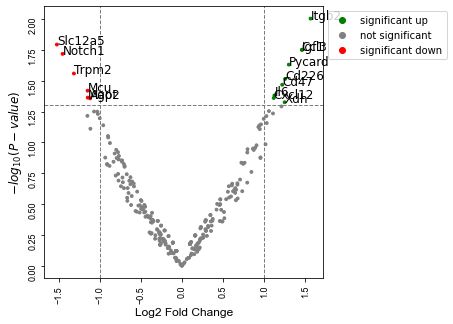

In [64]:
visuz.GeneExpression.volcano(df=unstim_MF, 
                             lfc='Log2 Fold Change', 
                             axxlabel = 'Log2 Fold Change', 
                             pv='p Value', 
                             show=True, 
                             plotlegend=True, 
                             legendpos='upper right',
                             legendanchor=(1.46,1), 
                             geneid='Gene Symbol', 
                             genenames='deg', 
                             gfont=12, 
                             sign_line=True, 
                             axlabelfontsize=12)

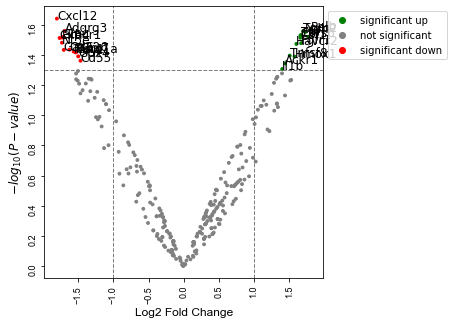

In [65]:
visuz.GeneExpression.volcano(df=df_M, 
                             lfc='Log2 Fold Change', 
                             axxlabel = 'Log2 Fold Change', 
                             pv='p Value', 
                             show=True, 
                             plotlegend=True, 
                             legendpos='upper right',
                             legendanchor=(1.46,1), 
                             geneid='Gene Symbol', 
                             genenames='deg', 
                             gfont=12, 
                             sign_line=True, 
                             axlabelfontsize=12)